# Example of regioncam on torch network

This example applies regioncam to show the progress of training a pytorch model on a 2d toy problem.

In [28]:
import regioncam
import numpy as np
import torch

torch.manual_seed(42);

In [29]:
# Generate a dataset
n = 10 # number of data points
k = 3  # number of classes
x = torch.randn((n,2))
y = torch.argmax(torch.rand((n,k)), dim=1)

In [30]:
# Construct a simple neural network
dim_hidden = 30
net = torch.nn.Sequential(
    torch.nn.Linear(2,dim_hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(30,30),
    torch.nn.LeakyReLU(), # regioncam supports ReLU and LeakyReLU activations
    torch.nn.Linear(dim_hidden,k),
)

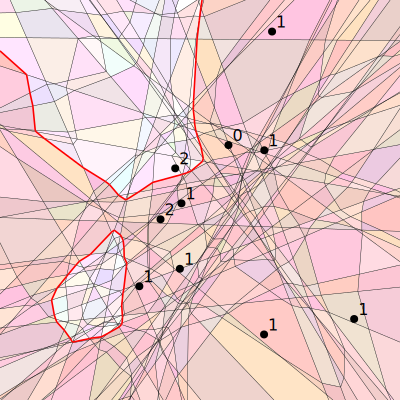

In [31]:
# Visualize the untrained network with regioncam
def visualize():
    rc = regioncam.Regioncam(2.5)
    rc.add(net)
    rc.decision_boundary() # Draw the decision boundary
    rc.set_format(size=400, line_width=0.4)
    rc.mark_points(x, labels=[str(i.item()) for i in y]) # Show the data points
    return rc
visualize()

In [32]:
# A simple training loop
def train(iterations=1000):
    optimizer = torch.optim.Adam(net.parameters())
    for it in range(iterations):
        optimizer.zero_grad()
        y_hat = net(x)
        loss = torch.nn.CrossEntropyLoss()(y_hat, y)
        loss.backward()
        optimizer.step()

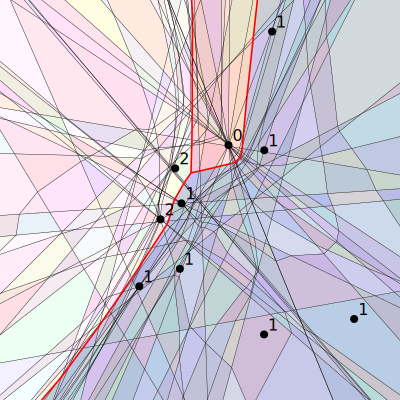

In [33]:
# Visualize the partially trained network
train()
visualize()

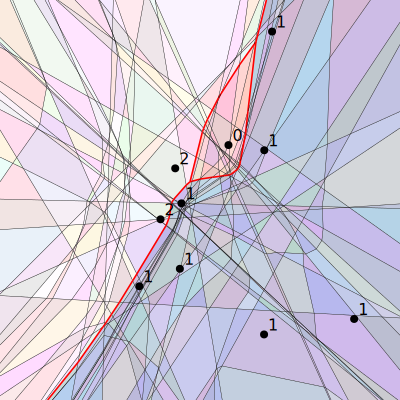

In [34]:
# Visualize the fully trained network
train(10000)
visualize()